# Telecom Churn CaseStudy

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

### Objectives
- The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

- Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

- Recommend strategies to manage customer churn based on your observations.

In [474]:
## Installing the required libraries
!pip install missingno
!pip install imbalanced-learn


In [475]:
# Read the data into dataframes

data = pd.read_csv("./train.csv")
unseen = pd.read_csv("./test.csv")
sample = pd.read_csv("./sample.csv")
data_dict = pd.read_csv("./data_dictionary.csv")

print("Dimension of the training dataset is", data.shape)
print("Dimension of the unseen dataset is", unseen.shape)
print("Dimension of the sample dataset is", sample.shape)
print("Dimension of the data dictionary is", data_dict.shape)

Dimension of the training dataset is (69999, 172)
Dimension of the unseen dataset is (30000, 171)
Dimension of the sample dataset is (30000, 2)
Dimension of the data dictionary is (36, 2)


In [476]:
### Check the first 5 rows of the training dataset

data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


#### Data Treatment

In this section identify the NaN or Null value columns, or Redundant columns which wouldnt add any value to analyis

In [477]:
cols_with_single_value = []
for col in data.columns:
    if data[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Delete columns with single value as they do not provide any information

In [478]:
data.drop(cols_with_single_value, axis=1, inplace=True)
unseen.drop(cols_with_single_value, axis=1, inplace=True)

In [479]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [480]:
##### Identify type of data

obj_cols = data.select_dtypes(include='object').columns
obj_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [481]:
# All of them are date columns and need not be that relevant for the model. We can drop them.
data.drop(obj_cols, axis=1, inplace=True)
unseen.drop(obj_cols, axis=1, inplace=True)

In [482]:
## CHeck for missing values in the training dataset
print(data.isnull().sum()/data.shape[0]*100 >0)

id                   False
arpu_6               False
arpu_7               False
arpu_8               False
onnet_mou_6           True
                     ...  
aon                  False
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
Length: 153, dtype: bool


In [483]:
# Check for the category columns. Category columns are those columns which have less than 5 unique values
cat_cols = [col for col in data.columns if data[col].nunique() < 5]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [484]:
cat_cols.remove('churn_probability')

In [485]:
data[cat_cols].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,1.0,1.0


In [486]:
# Fix the NaN values in the category columns with 0

data[cat_cols] = data[cat_cols].fillna(0)
unseen[cat_cols] = unseen[cat_cols].fillna(0)

In [487]:
## Convert Category columns to category type
data[cat_cols] = data[cat_cols].astype('category')
unseen[cat_cols] = unseen[cat_cols].astype('category')

In [488]:
data[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  69999 non-null  category
 1   night_pck_user_7  69999 non-null  category
 2   night_pck_user_8  69999 non-null  category
 3   fb_user_6         69999 non-null  category
 4   fb_user_7         69999 non-null  category
 5   fb_user_8         69999 non-null  category
dtypes: category(6)
memory usage: 411.0 KB


In [489]:
data[cat_cols].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0


In [490]:
# Check for the numerical columns
num_cols = [col for col in data.columns if col not in cat_cols]
data[num_cols].head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [491]:
## Group the numerical columns into segments based on the data dictionary
data_dict.head()

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls


In [492]:
## group ARPU, RECHARGE columns. Use regex to match the columns
arpu_cols = [col for col in num_cols if re.match(r'arpu_\d+', col)]
recharge_cols = [col for col in num_cols if '_rech_' in col]

In [493]:
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [494]:
### Impuation of missing values for ARPU and RECHARGE columns

data[arpu_cols].isna().sum()/data.shape[0]*100

arpu_6        0.000000
arpu_7        0.000000
arpu_8        0.000000
arpu_3g_6    74.902499
arpu_3g_7    74.478207
arpu_3g_8    73.689624
arpu_2g_6    74.902499
arpu_2g_7    74.478207
arpu_2g_8    73.689624
dtype: float64

####  Imputing missing values in Categorical Columns

In [495]:
# drop the columns with more than 40% missing values and update the arpu_cols

arpu_cols1 = [col for col in arpu_cols if data[col].isna().sum()/data.shape[0]*100 < 40]
data.drop([col for col in arpu_cols if data[col].isna().sum()/data.shape[0]*100 > 40], axis=1, inplace=True)
unseen.drop([col for col in arpu_cols if unseen[col].isna().sum()/unseen.shape[0]*100 > 40], axis=1, inplace=True)


In [496]:
# check the recharge columns that has more than 40% missing values

recharge_cols1 = [col for col in recharge_cols if data[col].isna().sum()/data.shape[0]*100 > 40]

data[recharge_cols1].isna().sum()/data.shape[0]*100

total_rech_data_6     74.902499
total_rech_data_7     74.478207
total_rech_data_8     73.689624
max_rech_data_6       74.902499
max_rech_data_7       74.478207
max_rech_data_8       73.689624
count_rech_2g_6       74.902499
count_rech_2g_7       74.478207
count_rech_2g_8       73.689624
count_rech_3g_6       74.902499
count_rech_3g_7       74.478207
count_rech_3g_8       73.689624
av_rech_amt_data_6    74.902499
av_rech_amt_data_7    74.478207
av_rech_amt_data_8    73.689624
dtype: float64

In [497]:
## As Reacharge columns are important, we can impute the missing values with 0

data[recharge_cols1] = data[recharge_cols1].fillna(0)
unseen[recharge_cols1] = unseen[recharge_cols1].fillna(0)

In [498]:
data[arpu_cols1+recharge_cols1].isna().sum()/data.shape[0]*100

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [499]:
## so the columns that are cleaned now are 
#arpu_cols1, recharge_cols1, cat_cols

#create a list of columns that are cleaned

clean_stage1_cols = arpu_cols1 + recharge_cols1 + cat_cols

data[clean_stage1_cols].head()

,arpu_6,arpu_7,arpu_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,...,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,31.277,87.009,7.527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.0,1.0,0.0,0.0,145.0,0.0,0.0,...,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.806,103.176,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,156.362,205.260,111.095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,240.708,128.191,101.565,7.0,7.0,6.0,25.0,41.0,25.0,7.0,...,0.0,175.0,191.0,142.0,0.0,0.0,0.0,1.0,1.0,1.0


In [500]:
untouched_cols = [col for col in data.columns if col not in clean_stage1_cols]

In [501]:
data[untouched_cols].head()

,id,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [502]:
# Find the columns that have missing values in the untouched columns and assign to untouched_cols1

untouched_cols1 = [col for col in untouched_cols if data[col].isna().sum()/data.shape[0]*100 > 0]
print(f'{len(untouched_cols1)} column have missing values')
print(round(data[untouched_cols1].isna().sum()/data.shape[0]*100,2).sort_values(ascending=False))

81 column have missing values
ic_others_8         5.29
loc_og_t2m_mou_8    5.29
std_og_mou_8        5.29
spl_og_mou_8        5.29
std_og_t2f_mou_8    5.29
                    ... 
std_og_t2f_mou_7    3.84
og_others_7         3.84
std_og_mou_7        3.84
spl_og_mou_7        3.84
isd_og_mou_7        3.84
Length: 81, dtype: float64


In [503]:
# As the missing values are less than 5%, we can impute them with the mean value use SimpleImputer from sklearn

imputer = SimpleImputer(strategy='constant', fill_value=0)
data[untouched_cols1] = imputer.fit_transform(data[untouched_cols1])
unseen[untouched_cols1] = imputer.transform(unseen[untouched_cols1])

In [504]:
data.columns[data.isna().sum()>0]
## No missing values in the dataset

Index([], dtype='object')

In [505]:
# Make id as index for the dataset and unseen dataset
data.set_index('id', inplace=True)
unseen.set_index('id', inplace=True)

In [506]:
## Create a copy of data for further processing
final_columns = list(data.columns)
data1 = data.copy()

In [507]:
unseen.columns[unseen.isna().sum()>0]

Index([], dtype='object')

#### Common Functions to be created
 - Bar Chart
 - Outlier Handling
 - Classification Metrics

In [508]:
def bar_chart(title, month, y_list, data):
    ## Plotting subplot for each month

    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    plt.figure(figsize=(15, 10))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()

In [509]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [510]:
def classication_mertics(y_true,y_pred):
    # Confusion Matrix

    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix")
    print(cm)

    # True Positive, True Negative, False Positive, False Negative

    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]

    # Precision

    precision = precision_score(y_true, y_pred)
    print("Precision: ", precision)

    # Recall

    recall = recall_score(y_true, y_pred)
    print("Recall: ", recall)

    # sensitivity, specificity, false positive rate

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    fpr = FP / (FP + TN)

    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("False Positive Rate: ", fpr)

    # Accuracy

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print("Accuracy: ", accuracy)

    # print as a dataframe

    metrics = pd.DataFrame({'Precision': precision, 'Recall': recall, 'Sensitivity': sensitivity, 'Specificity': specificity, 'False Positive Rate': fpr, 'Accuracy': accuracy}, index=[0])
    print(metrics.head())
    return metrics
 



In [511]:
## Function to box plot

def box_plot(title, data):
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation = 45)
    plt.title(title)
    sns.boxplot(data=data)
    plt.show()

In [512]:
# Exploratory Data Analysis

# Boxplot for the numerical columns 
#Update num_cols to remove the columns that are dropped

# Revenue columns
# Recharge columns
# Category columns
# Other numerical columns

print(f'Revenue columns: {arpu_cols1}')
print(f'Recharge columns: {recharge_cols1}')
print(f'Category columns: {cat_cols}')
print(f'Other numerical columns: {untouched_cols1}')


Revenue columns: ['arpu_6', 'arpu_7', 'arpu_8']
Recharge columns: ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
Category columns: ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
Other numerical columns: ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_o

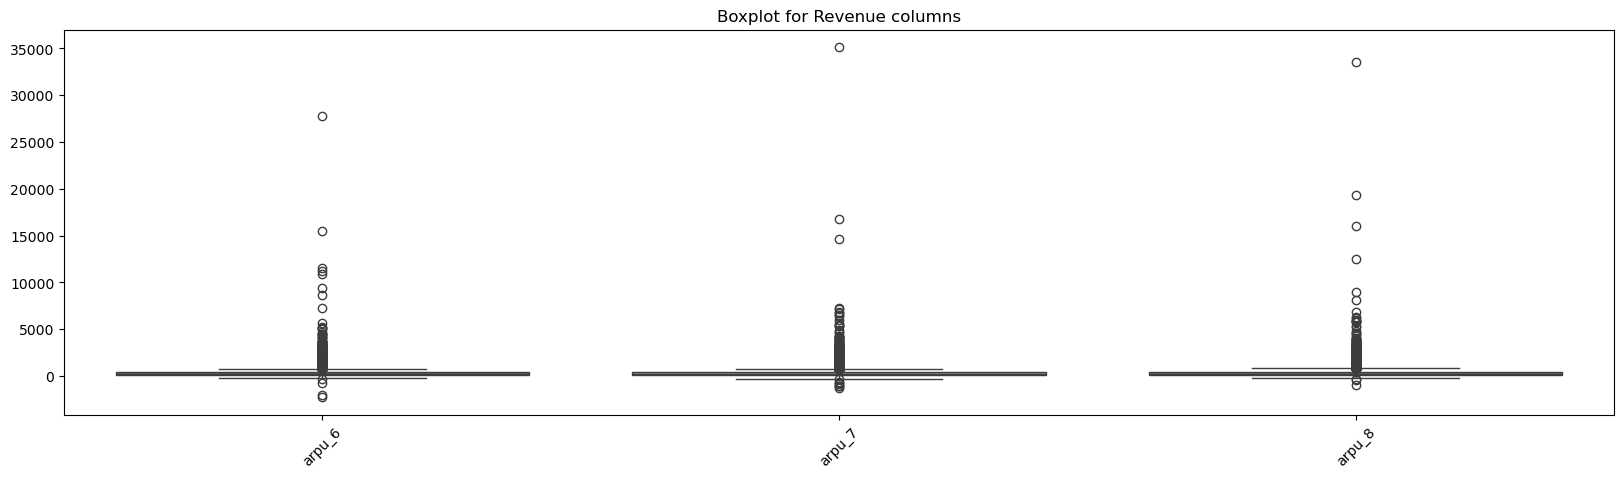

In [513]:
# Boxplot for the Revenue columns

box_plot('Boxplot for Revenue columns', data[arpu_cols1])

In [514]:
## Handle the outliers in the revenue columns

data[arpu_cols1] = data[arpu_cols1].apply(cap_outliers, axis=0)

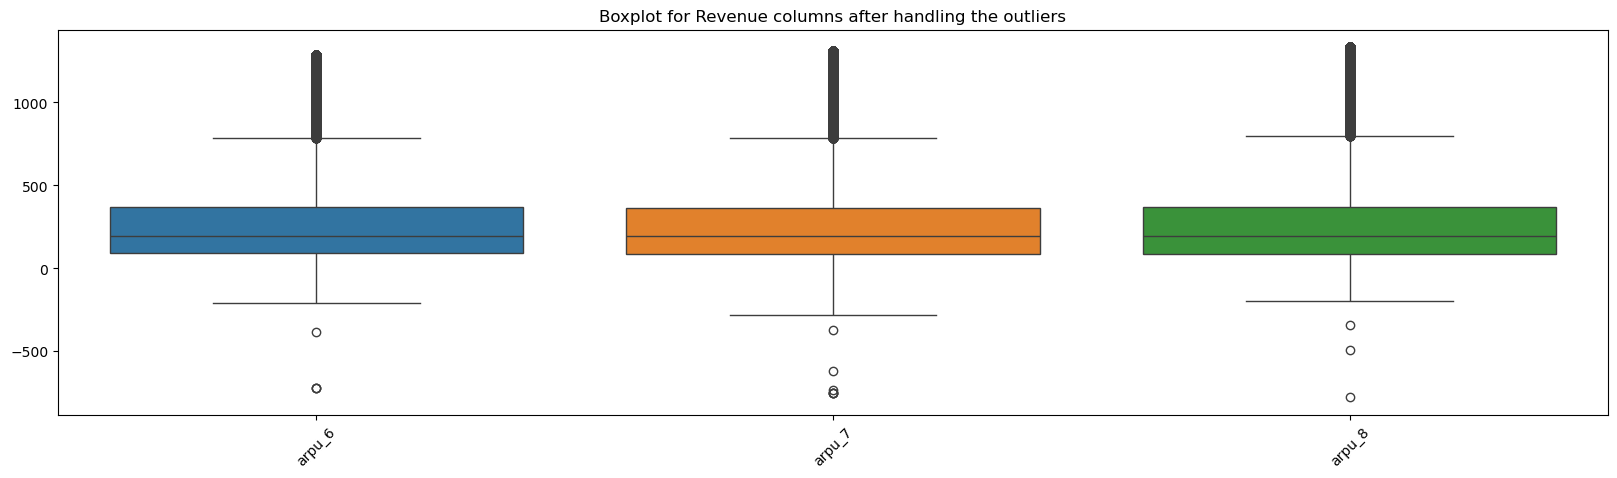

In [515]:
# Boxplot for the Revenue columns after handling the outliers

box_plot('Boxplot for Revenue columns after handling the outliers', data[arpu_cols1])

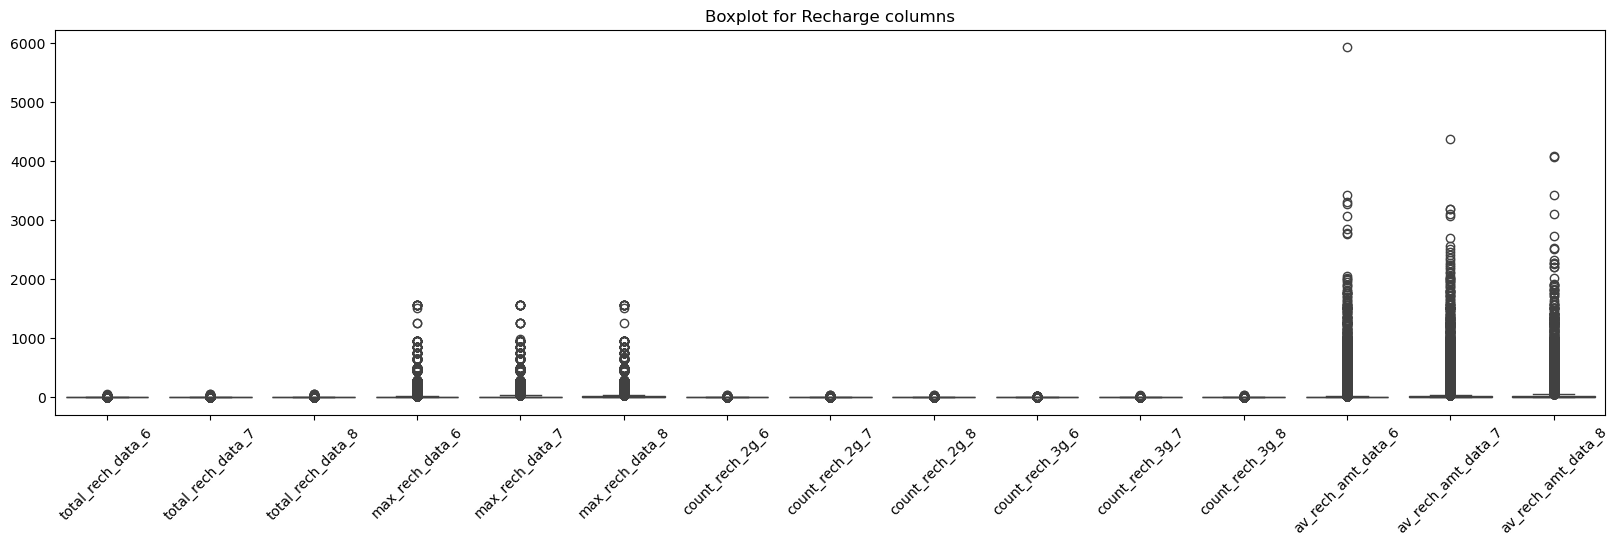

In [516]:
## Boxplot for the Recharge columns

box_plot('Boxplot for Recharge columns', data[recharge_cols1])

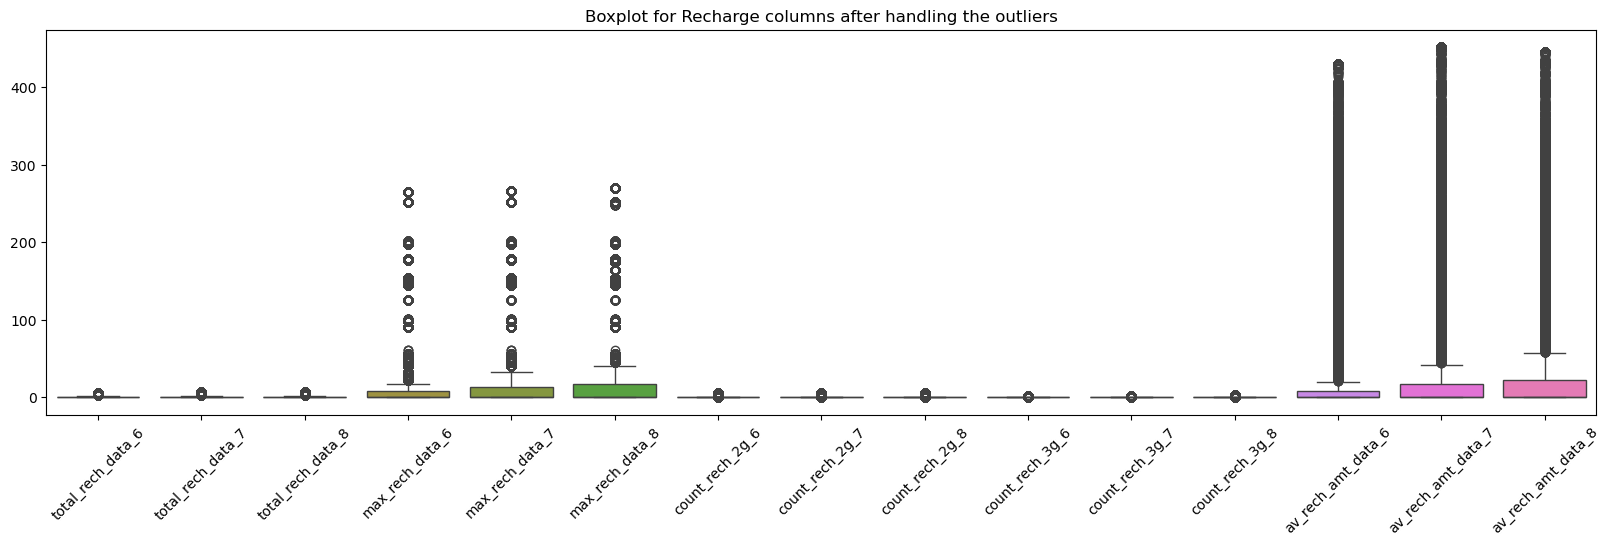

In [517]:
## Handle the outliers in the recharge columns

data[recharge_cols1] = data[recharge_cols1].apply(cap_outliers, axis=0)

# Boxplot for the Recharge columns after handling the outliers

box_plot('Boxplot for Recharge columns after handling the outliers', data[recharge_cols1])

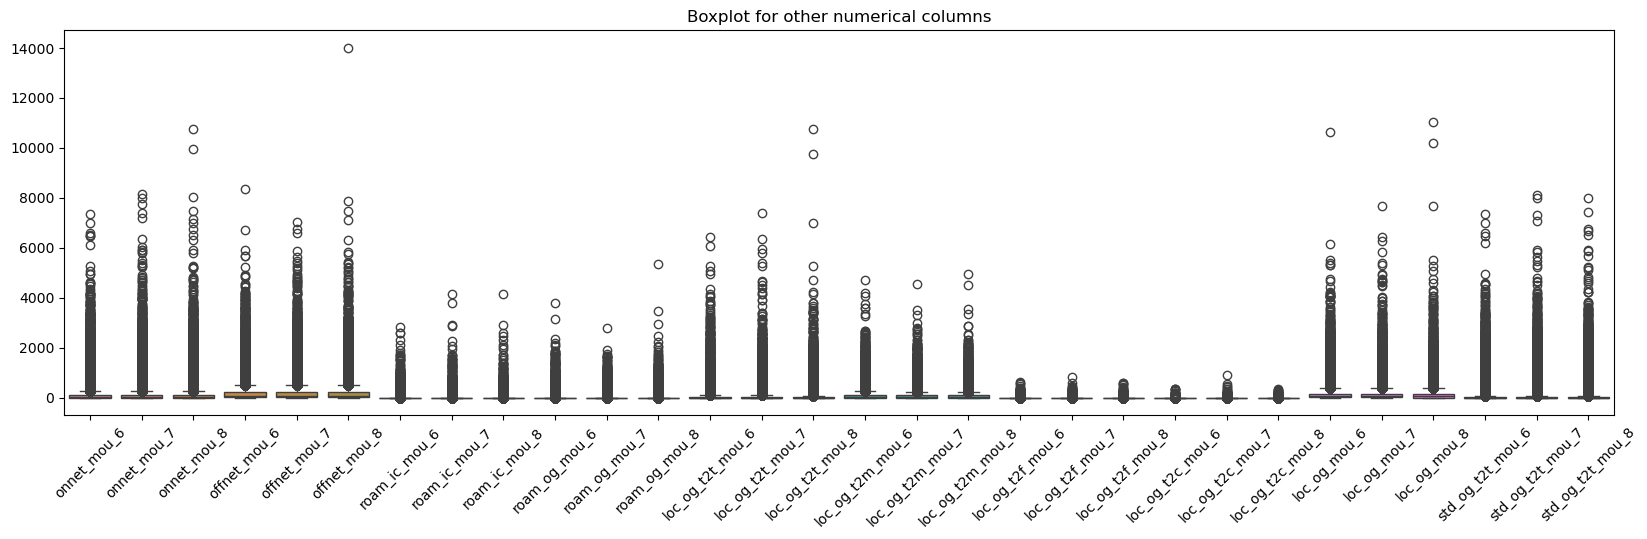

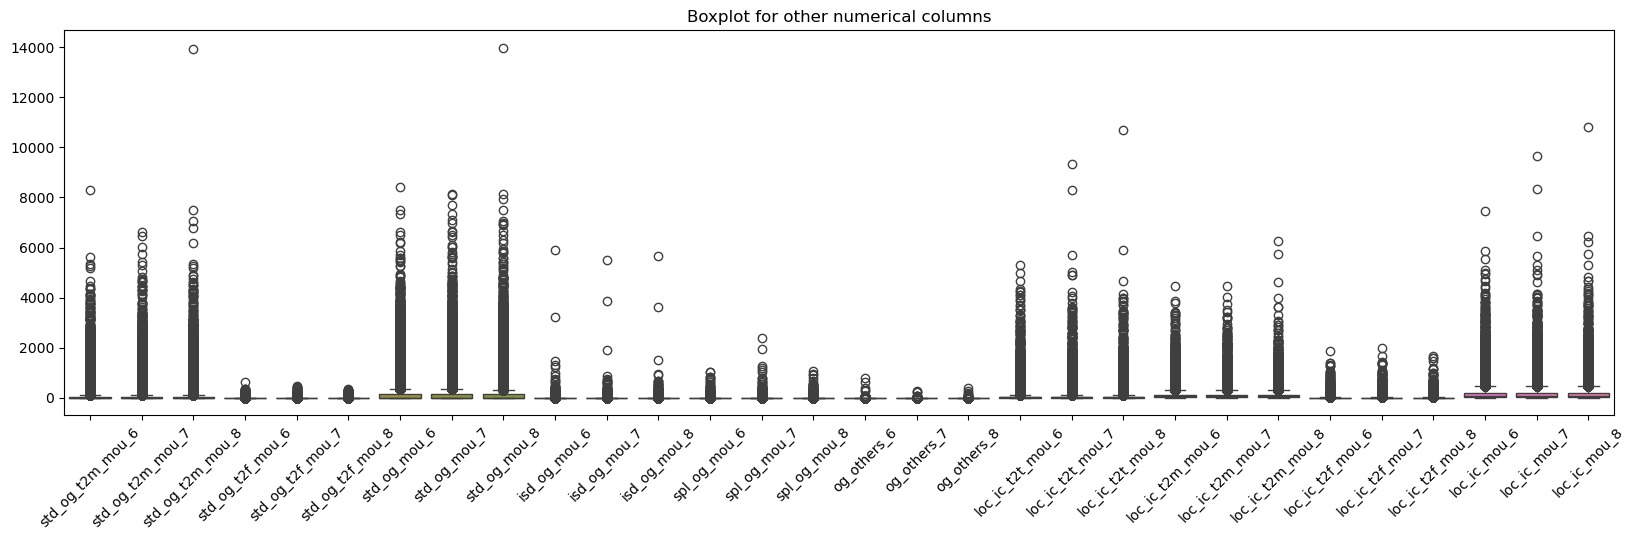

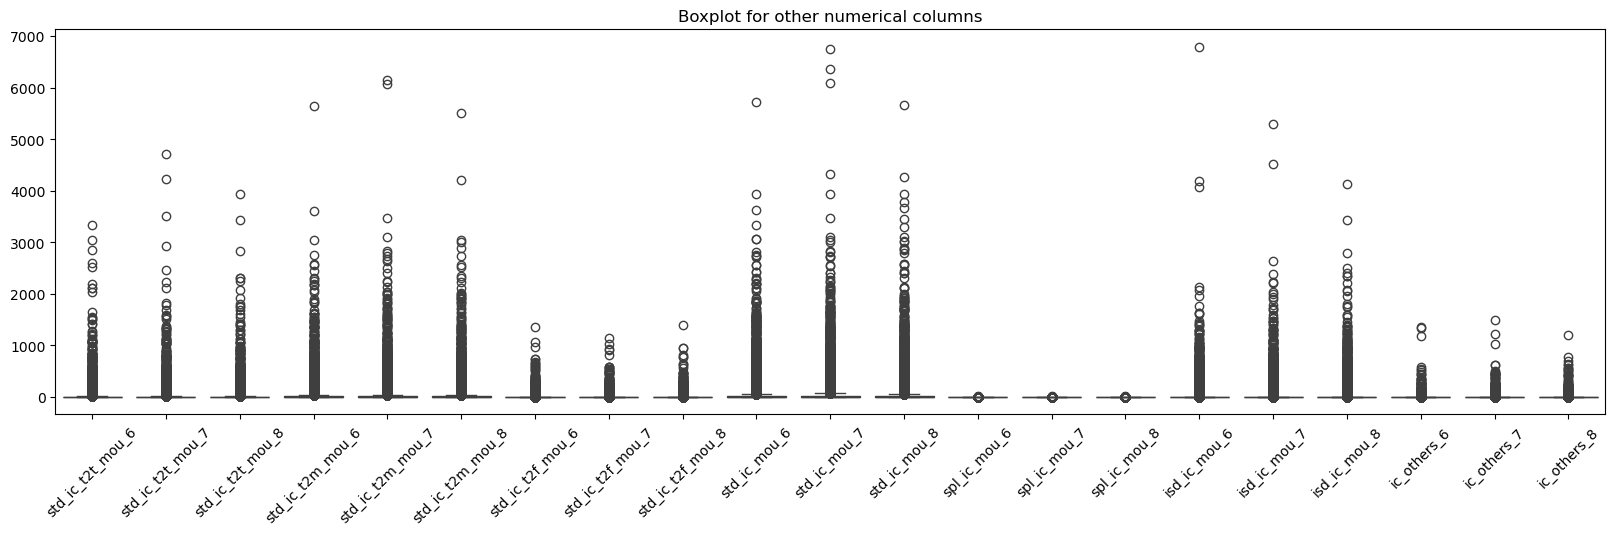

In [518]:
## Boxplot for the other numerical columns

group = 30

for i in range(0, len(untouched_cols1), group):
    box_plot('Boxplot for other numerical columns', data[untouched_cols1[i:i+group]])

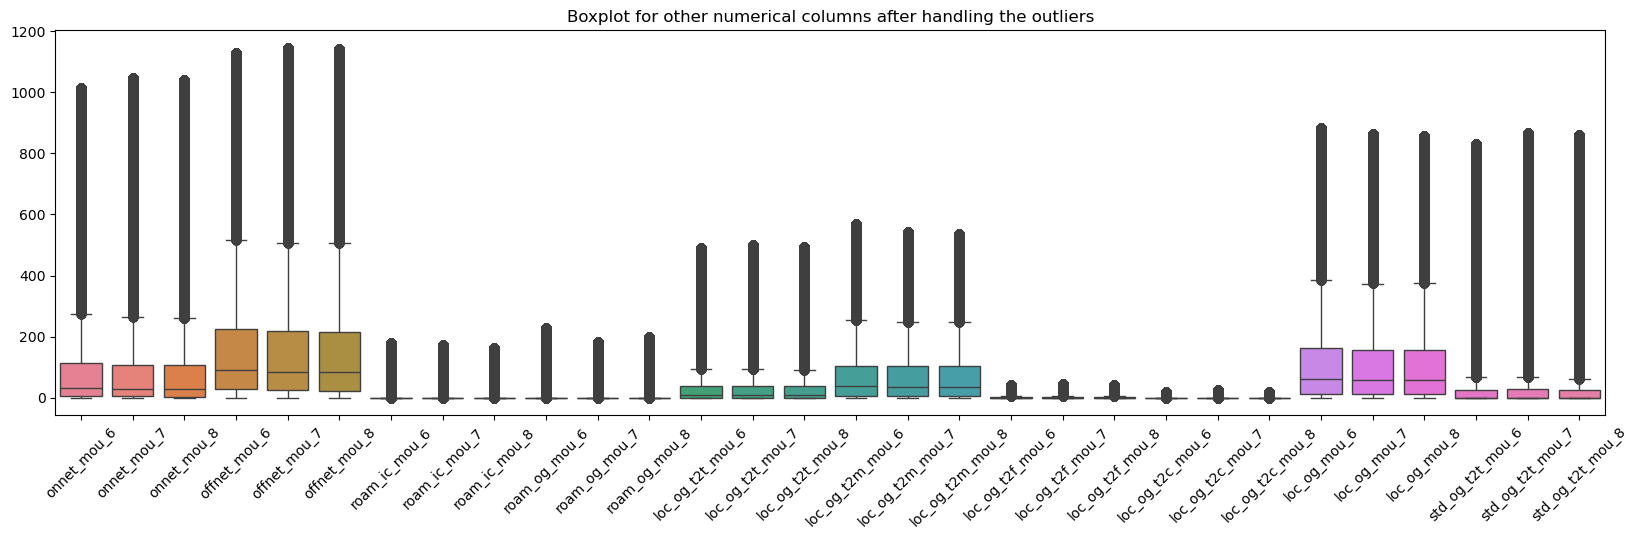

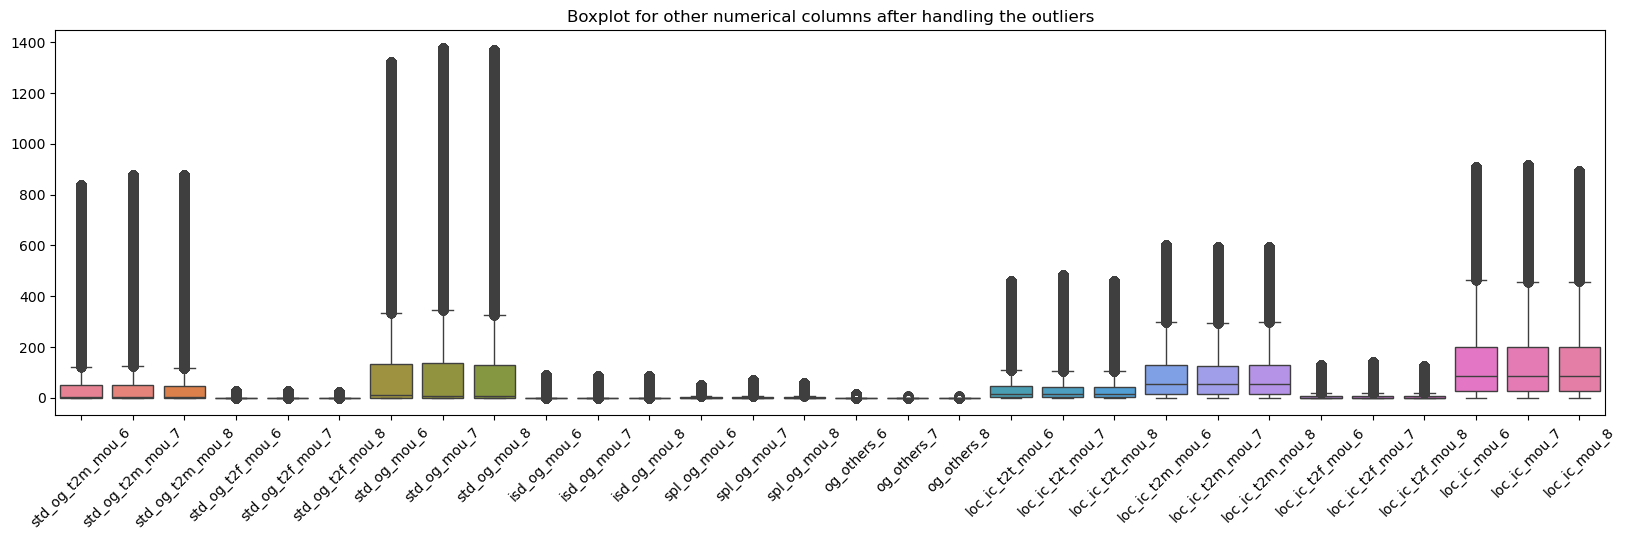

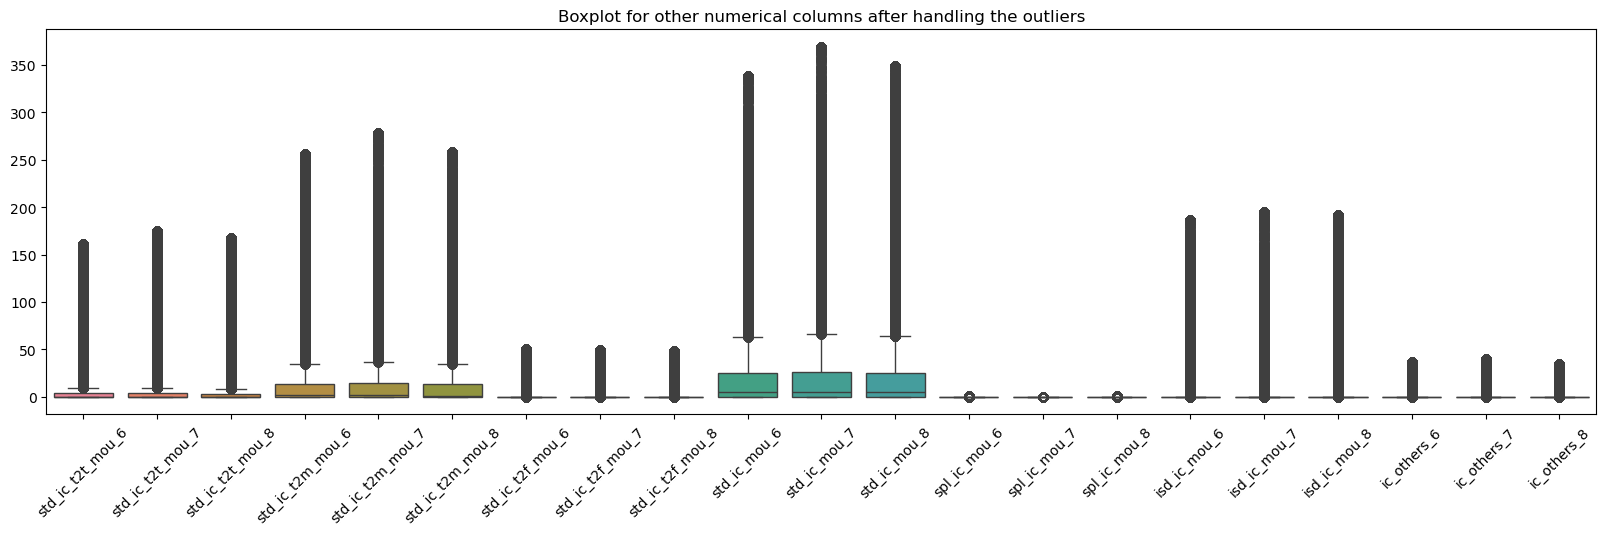

In [519]:
## handle the outliers in the other numerical columns

data[untouched_cols1] = data[untouched_cols1].apply(cap_outliers, axis=0)

# Boxplot for the other numerical columns after handling the outliers

for i in range(0, len(untouched_cols1), group):
    box_plot('Boxplot for other numerical columns after handling the outliers', data[untouched_cols1[i:i+group]])
    

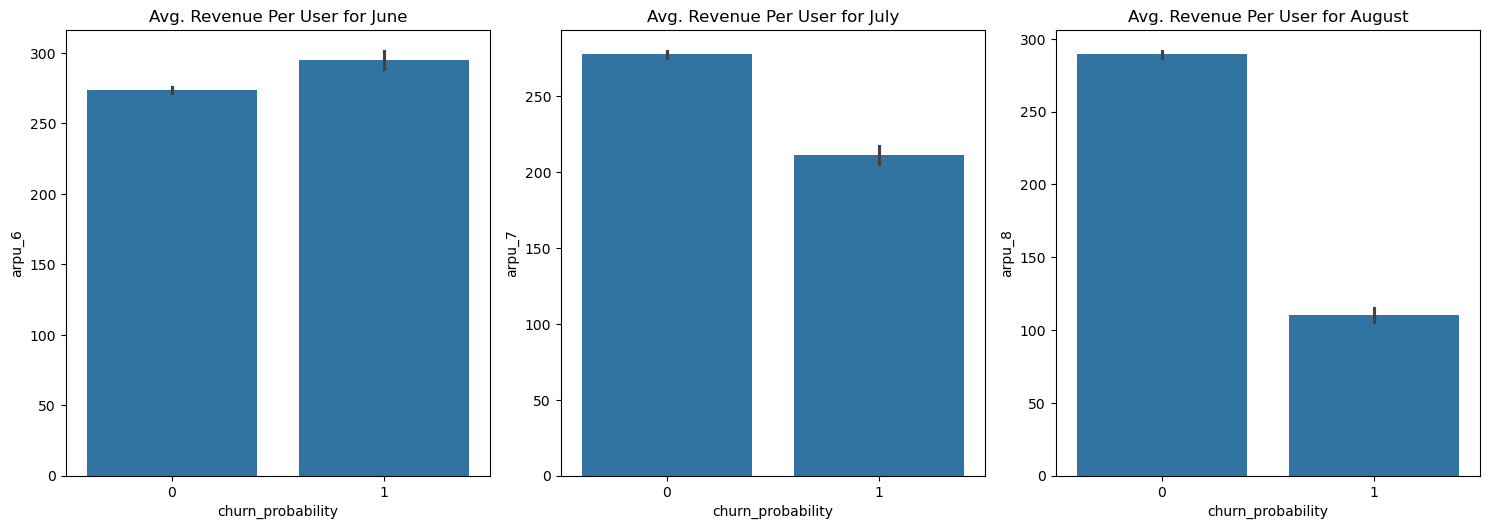

In [520]:
## check for the distribution of the target variable churn_probability with respect to the categorical columns

bar_chart('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols1, data)

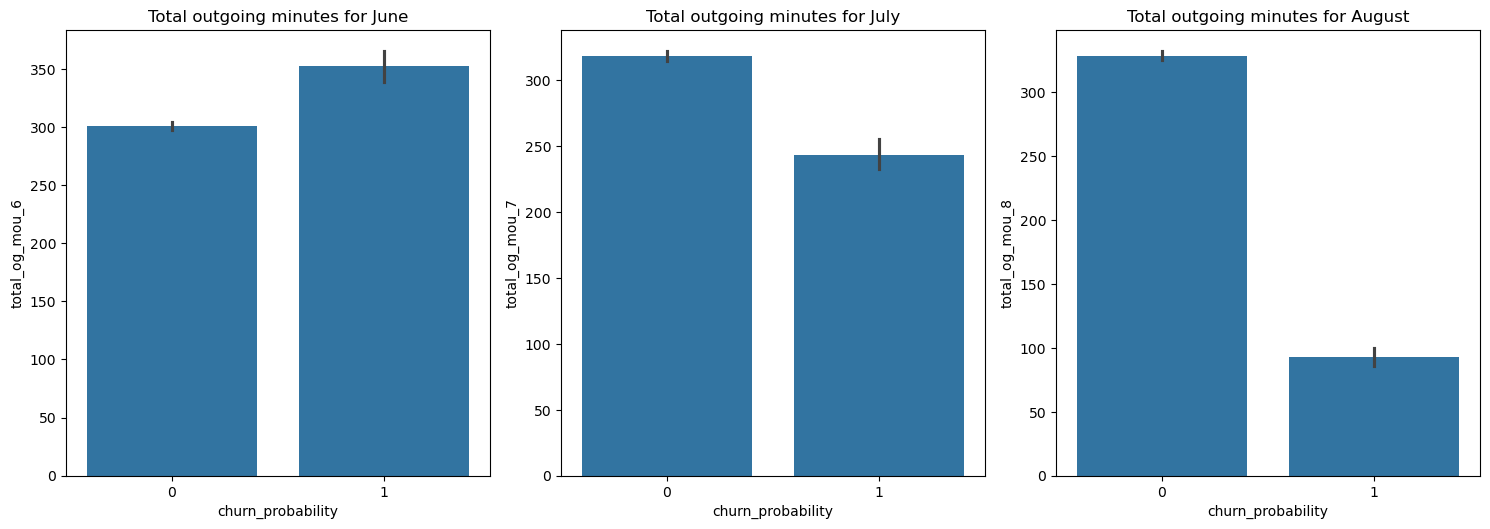

In [521]:
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
bar_chart('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, data)

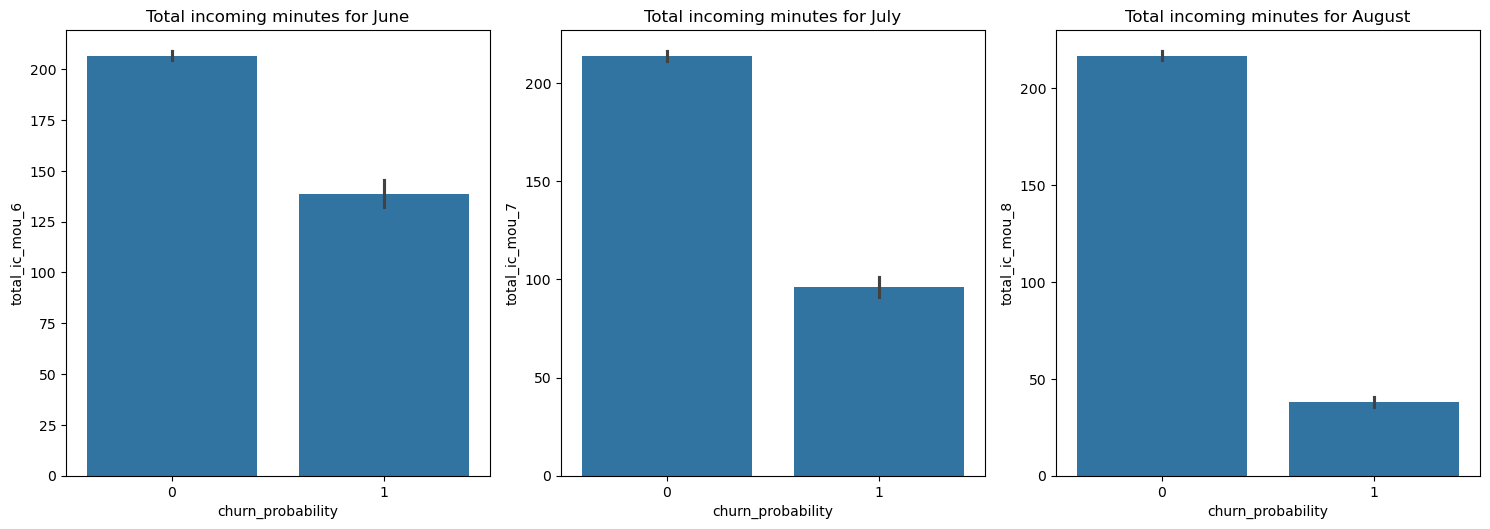

In [522]:
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
bar_chart('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, data)

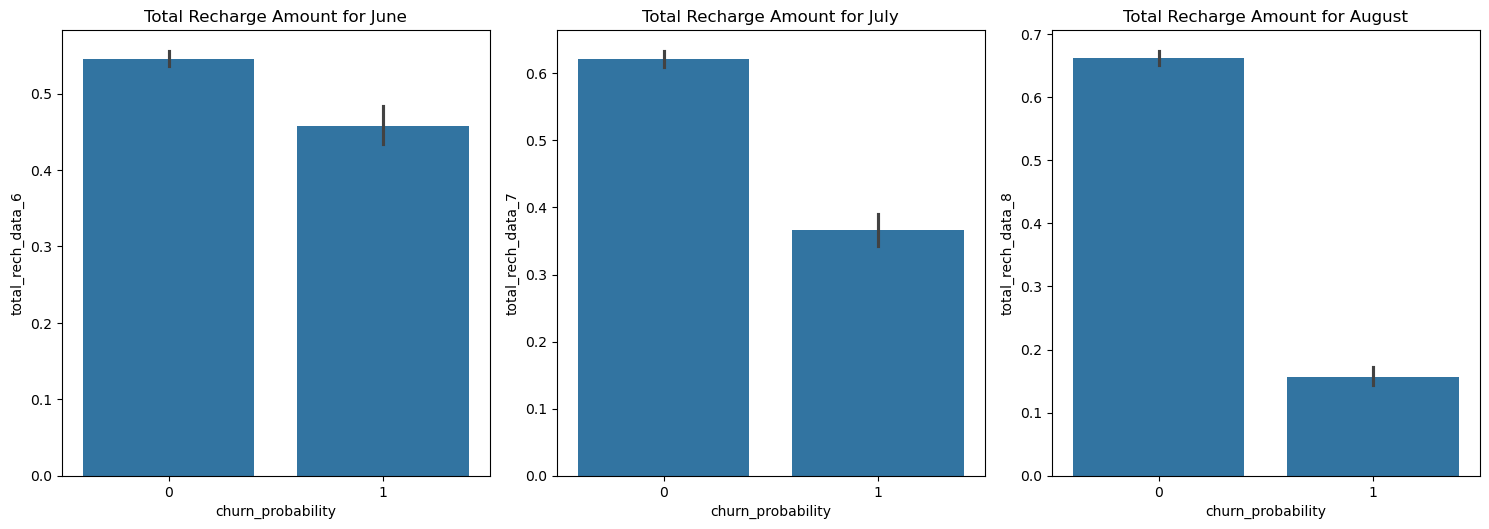

In [523]:
bar_chart('Total Recharge Amount', ['June', 'July', 'August'], recharge_cols1, data)

**In the Month of August users have shown trend of declining usage, revenue, Recharge**

In [524]:
### Create groups for analysing the data for correlation

data_og_mou = data.loc[:, data.columns.str.contains('og_mou')]
data_ic_mou = data.loc[:, data.columns.str.contains('ic_mou')]
data_recharge = data.loc[:, data.columns.str.contains('rech_amt')]
data_arpu = data.loc[:, data.columns.str.contains('arpu')]
data_amt = data.loc[:, data.columns.str.contains('amt')]
data_total = data.loc[:, data.columns.str.contains('total')]

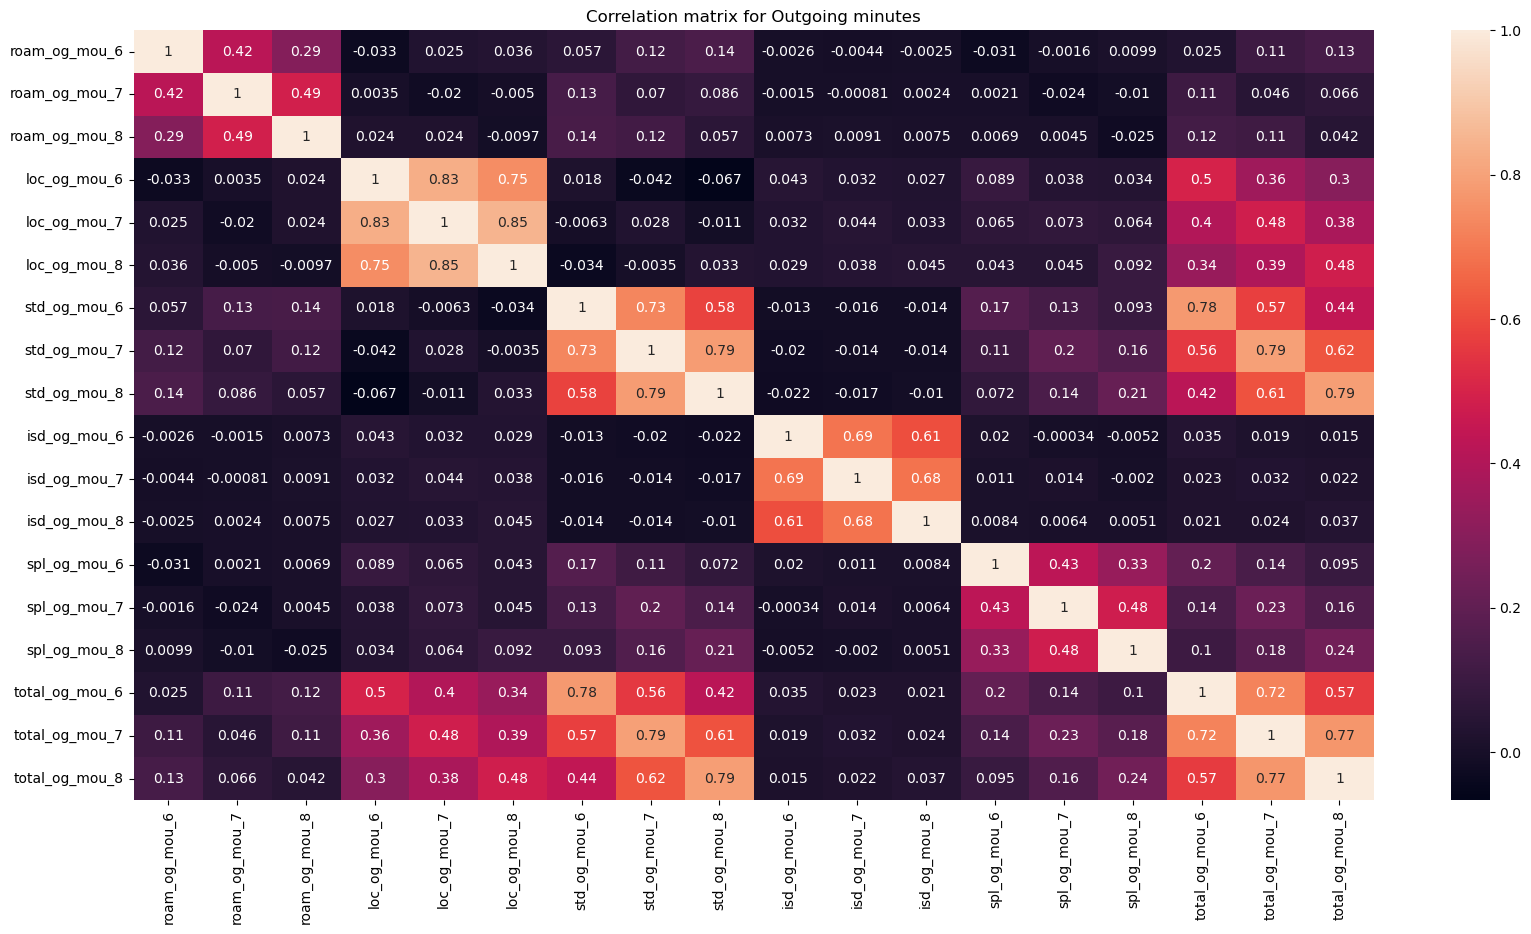

In [525]:
## Plot the correlation matrix for the groups

plt.figure(figsize=(20, 10))
sns.heatmap(data_og_mou.corr(), annot=True)
plt.title('Correlation matrix for Outgoing minutes')
plt.show()

##### Minutes of Usage has shown correlation between months, Specially 7 &8 Month has shown good correlation


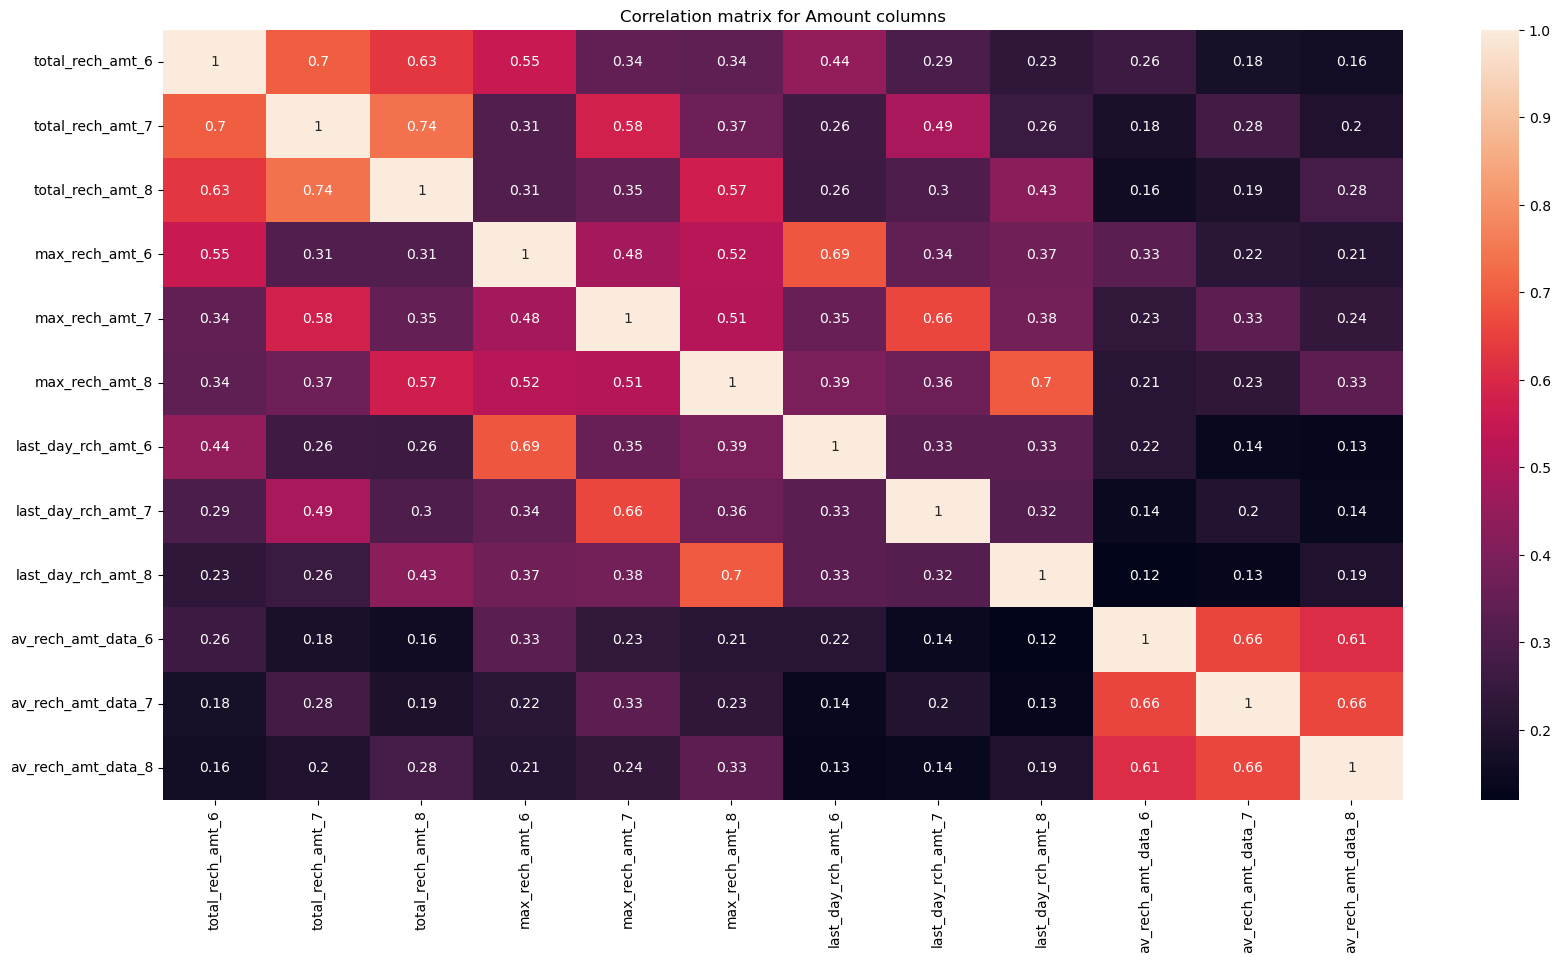

In [526]:
## Ammount columns

plt.figure(figsize=(20, 10))
sns.heatmap(data_amt.corr(), annot=True)
plt.title('Correlation matrix for Amount columns')
plt.show()

##### Average recharge amount and total recharge between June, July and August are decently correlated.

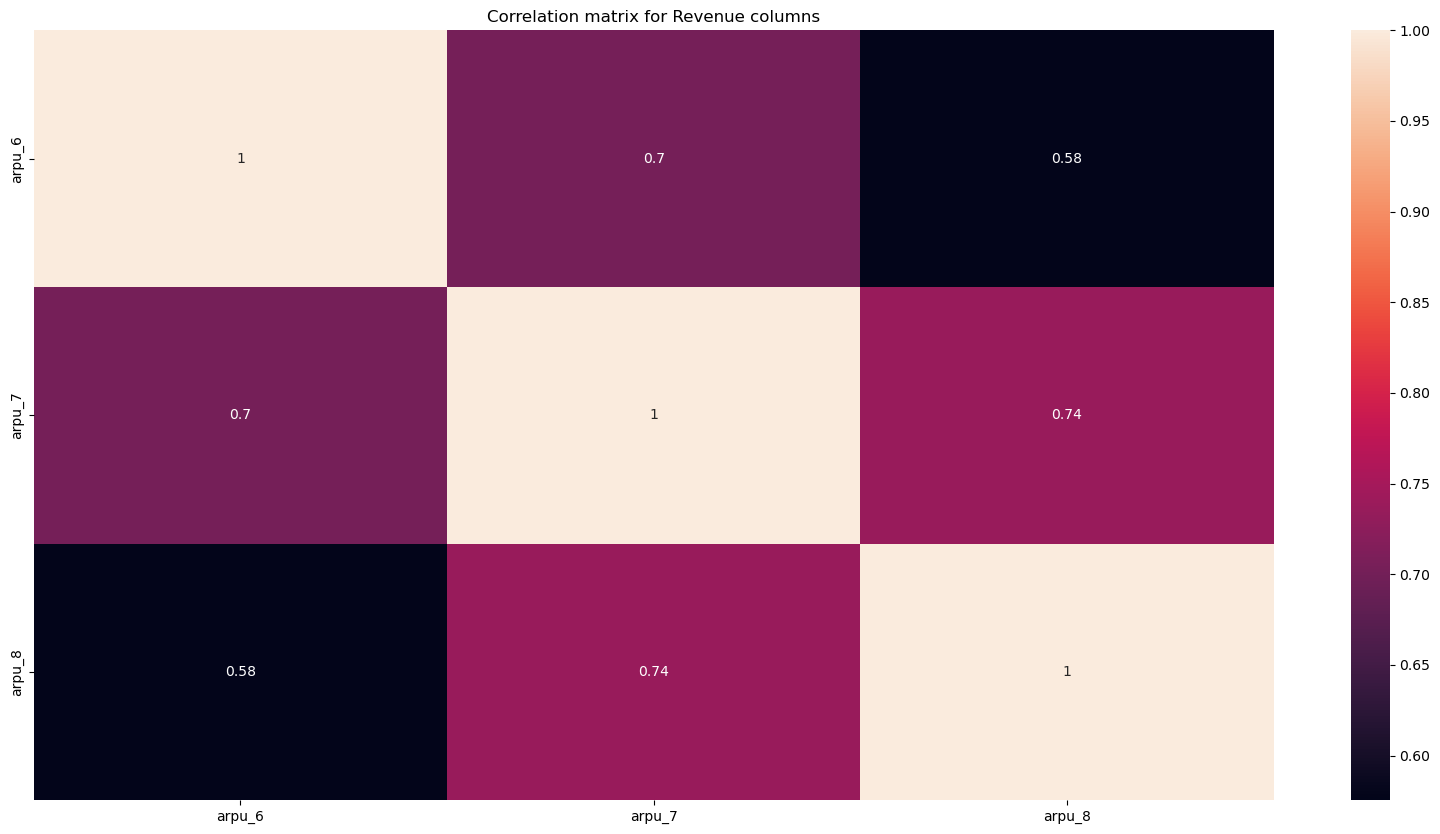

In [527]:
## Revenue columns

plt.figure(figsize=(20, 10))
sns.heatmap(data_arpu.corr(), annot=True)
plt.title('Correlation matrix for Revenue columns')
plt.show()

##### Good correlation between the Revenue of July and August positively

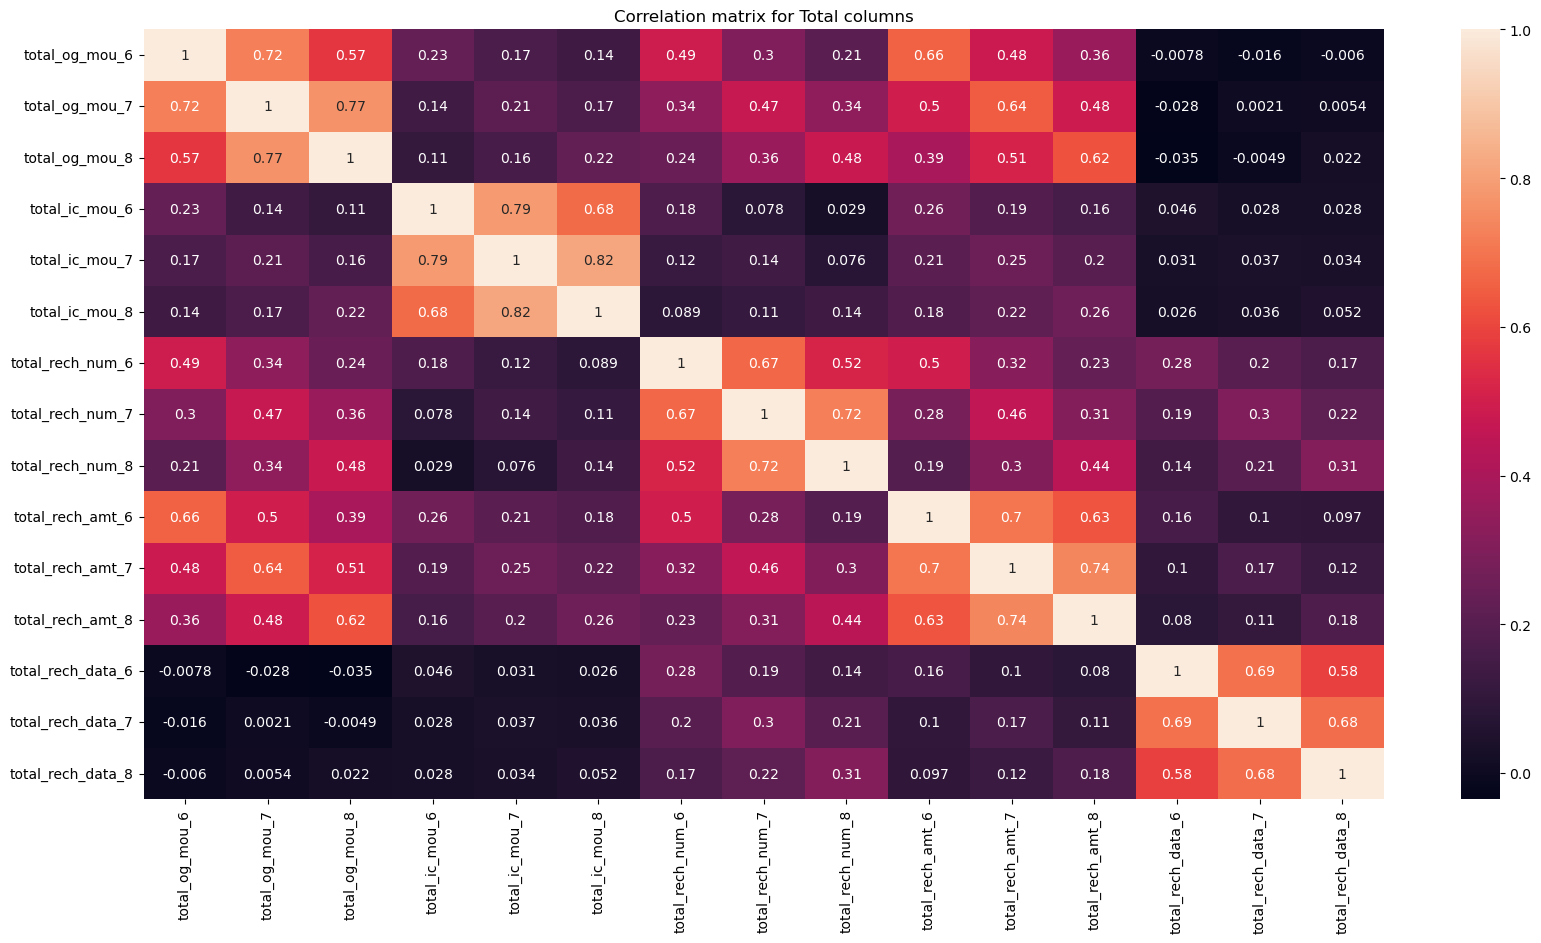

In [528]:
## Total columns

plt.figure(figsize=(20, 10))
sns.heatmap(data_total.corr(), annot=True)
plt.title('Correlation matrix for Total columns')
plt.show()


#### In different categories of features, we can see that there is high correlation between the July and August columns.

In [529]:
#### Feature Engineering
## Make copy of data

data1 = data.copy()
unseen1 = unseen.copy()

In [530]:
final_columns1 = list(data.columns)

print(f'Columns in the dataset: {len(final_columns1)}')

Columns in the dataset: 146


In [531]:
## Encode the category columns using one hot encoding

data1 = pd.get_dummies(data1, columns=cat_cols, drop_first=True)
unseen1 = pd.get_dummies(unseen1, columns=cat_cols, drop_first=True)


In [532]:
final_columns1 = list(data1.columns)
print(f'Columns in the dataset: {len(final_columns1)}')
data1.shape, unseen1.shape

Columns in the dataset: 146


((69999, 146), (30000, 145))

In [533]:
#### Get the data ready for the model X, y

y= data1['churn_probability']
X = data1.drop('churn_probability', axis=1)

In [534]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [535]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (55999, 145)
y_train Shape: (55999,)
X_val Shape: (14000, 145)
y_val Shape: (14000,)


In [536]:
y_train.value_counts()

churn_probability
0    50259
1     5740
Name: count, dtype: int64

#### Class imbalance
 - Class imbalance can be handled by oversampling the minority class or undersampling the majority class.
 - Oversampling the minority class using SMOTE

In [537]:
### Handling the class imbalance

smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [538]:
# Checking the shape after oversampling
X_train_smote.shape, y_train_smote.shape

# Checking the class distribution after oversampling
y_train_smote.value_counts()


churn_probability
1    50259
0    50259
Name: count, dtype: int64

In [539]:

#Create a copy

X_train_smote1 = X_train_smote.copy()
X_val1 = X_val.copy()
y_val1 = y_val.copy()
y_train_smote1 = y_train_smote.copy()

### Scaling

Scaling is performed to bring data of different scale to same scale. This makes co-efficients to be similar between the features

In [540]:
### Feature Scaling using SandardScaler - Training Set

scaler = StandardScaler()

X_train_smote1 = scaler.fit_transform(X_train_smote1)
X_val1 = scaler.transform(X_val1)

### Feature Scaling using SandardScaler - Unseen Set

unseen1 = scaler.transform(unseen1)


In [541]:
### convert to dataframe

X_train_smote1 = pd.DataFrame(X_train_smote1, columns=X_train.columns)
X_val1 = pd.DataFrame(X_val1, columns=X_val.columns)
unseen1 = pd.DataFrame(unseen1, columns=unseen.columns)

### Build model with Logistic Regression using RFE to find the important features.
RFE (Recursive Feature Elimination) is another technique used for feature selection and dimensionality reduction.RFE helps identify the most important features directly.

In [542]:
%%time
### Logistic Regression with RFE

from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=500, tol=0.0001, random_state=100)
rfe = RFE(estimator=logreg, n_features_to_select=30, step=1)
rfe = rfe.fit(X_train_smote1, y_train_smote1)

# Selected features

selected_features = X_train_smote1.columns[rfe.support_]
selected_features

CPU times: total: 25min 7s
Wall time: 4min 16s


Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_8', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

##### 30 Features are identified using RFE. These features would be used in building & validating other models

In [543]:
list(zip(X_train_smote1.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 14),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 34),
 ('onnet_mou_7', False, 44),
 ('onnet_mou_8', False, 39),
 ('offnet_mou_6', False, 80),
 ('offnet_mou_7', False, 42),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 94),
 ('roam_ic_mou_7', False, 92),
 ('roam_ic_mou_8', False, 114),
 ('roam_og_mou_6', False, 81),
 ('roam_og_mou_7', False, 93),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 38),
 ('loc_og_t2t_mou_7', False, 23),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 21),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 108),
 ('loc_og_t2f_mou_8', False, 63),
 ('loc_og_t2c_mou_6', False, 99),
 ('loc_og_t2c_mou_7', False, 112),
 ('loc_og_t2c_mou_8', False, 75),
 ('loc_og_mou_6', False, 37),
 ('loc_og_mou_7', False, 22),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 33),
 ('std_og_t2t_mou_7', False, 71),
 ('std_og

In [544]:
selected_features = X_train_smote1.columns[rfe.support_]

In [545]:
# Check the model performance with the selected features on Training and Validation set

logreg.fit(X_train_smote1[selected_features], y_train_smote1)



LogisticRegression(max_iter=500, random_state=100)

In [546]:
## Predict on the training set

y_train_pred = logreg.predict(X_train_smote1[selected_features])


In [547]:
## Accuracy on the training set

print("Training Set")
df1 =metrics_train = classication_mertics(y_train_smote1, y_train_pred)
df1

Training Set
Confusion Matrix
[[40959  9300]
 [ 5218 45041]]
Precision:  0.8288585046281813
Recall:  0.8961777990011739
Sensitivity:  0.8961777990011739
Specificity:  0.814958514892855
False Positive Rate:  0.185041485107145
Accuracy:  0.8555681569470145
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0   0.828859  0.896178     0.896178     0.814959             0.185041   

   Accuracy  
0  0.855568  


,Precision,Recall,Sensitivity,Specificity,False Positive Rate,Accuracy
0,0.828859,0.896178,0.896178,0.814959,0.185041,0.855568


In [548]:

## Predict on the validation set
y_val_pred = logreg.predict(X_val1[selected_features])

## Accuracy on the validation set
print("Validation Set")
metrics_val = classication_mertics(y_val1, y_val_pred)
metrics_val.head()

Validation Set
Confusion Matrix
[[10358  2250]
 [  252  1140]]
Precision:  0.336283185840708
Recall:  0.8189655172413793
Sensitivity:  0.8189655172413793
Specificity:  0.8215418781725888
False Positive Rate:  0.17845812182741116
Accuracy:  0.8212857142857143
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0   0.336283  0.818966     0.818966     0.821542             0.178458   

   Accuracy  
0  0.821286  


,Precision,Recall,Sensitivity,Specificity,False Positive Rate,Accuracy
0,0.336283,0.818966,0.818966,0.821542,0.178458,0.821286


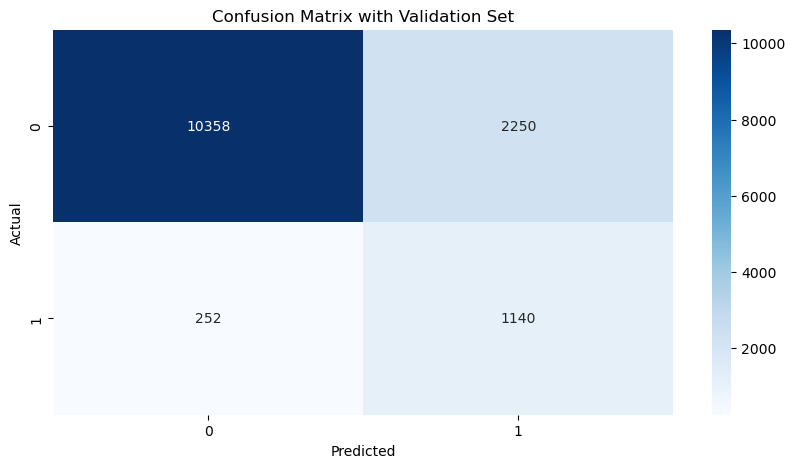

In [550]:
## Plot confusion matrix for the validation set



cm = confusion_matrix(y_val1, y_val_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# labels

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Validation Set')
plt.show()

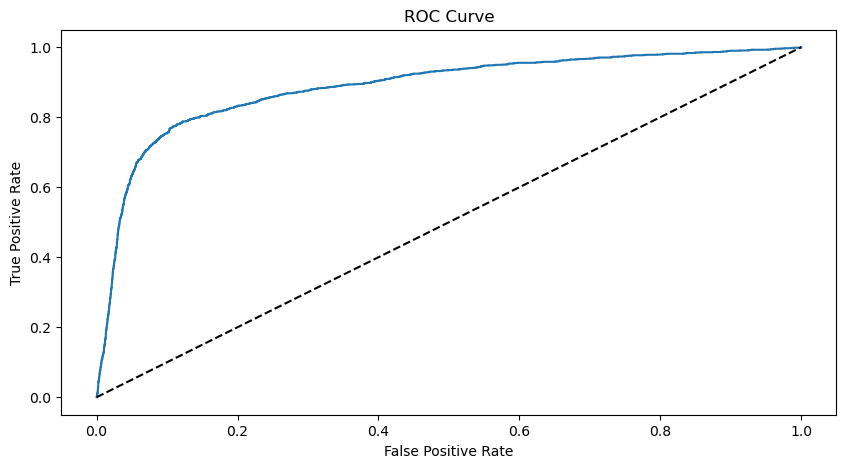

In [551]:
## ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
# Predict the probability of churn on the validation set
y_val_pred_prob = logreg.predict_proba(X_val1[selected_features])[:,1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val1, y_val_pred_prob)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC Curve shows that the model is performing well with an AUC of 0.85

##### **In Logistic Regression with 30 features selected from RFE, the Training accuracy was 85% and test accucary is 82%
Build other classfication models to achieve higher accuracy


#### Building Model with with PCA. 
In PCA, the original features (variables) of a dataset are transformed into a new set of uncorrelated variables, known as principal components. These components are linear combinations of the original features and are ordered such that the first few retain most of the variation present in the original data.

In [552]:
## Logistic Regression with PCA

#Create a copy of the data again for PCA. This data is not a scaled data
X_train_pca = X_train_smote.copy()
X_val_pca = X_val.copy()
y_val_pca = y_val.copy()
y_train_pca = y_train_smote.copy()


In [553]:
pca = PCA(n_components=30)

X_train_pca = pca.fit_transform(X_train_pca)
X_val_pca = pca.transform(X_val_pca)

# Check the variance explained by the components

print('Variance explained by the components:', pca.explained_variance_ratio_)
print('Total Variance explained:', np.sum(pca.explained_variance_ratio_))

# Convert to dataframe

X_train_pca = pd.DataFrame(X_train_pca)
X_val_pca = pd.DataFrame(X_val_pca)

# Logistic Regression

logreg = LogisticRegression(max_iter=500, tol=0.0001, random_state=100)
logreg.fit(X_train_pca, y_train_pca)


# Predict on the training set

y_train_pred_pca = logreg.predict(X_train_pca)

# Accuracy on the training set

print("Training Set")
metrics_train_pca = classication_mertics(y_train_pca, y_train_pred_pca)
metrics_train_pca.head()

# Predict on the validation set

y_val_pred_pca = logreg.predict(X_val_pca)

# Accuracy on the validation set

print("Validation Set")
metrics_val_pca = classication_mertics(y_val_pca, y_val_pred_pca)


Variance explained by the components: [0.2660873  0.1890872  0.14397527 0.07027277 0.05849929 0.03311763
 0.02885516 0.0269259  0.02572628 0.016707   0.01637976 0.01588009
 0.0122465  0.00974884 0.00751024 0.00703034 0.00607517 0.00585988
 0.00463542 0.00438188 0.00385336 0.00371141 0.00343255 0.0032442
 0.00297872 0.00293932 0.00267641 0.00254763 0.00231111 0.00197231]
Total Variance explained: 0.9786689541642848
Training Set
Confusion Matrix
[[38013 12246]
 [ 6782 43477]]
Precision:  0.7802343735979757
Recall:  0.8650589944089616
Sensitivity:  0.8650589944089616
Specificity:  0.7563421476750433
False Positive Rate:  0.24365785232495674
Accuracy:  0.8107005710420024
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0   0.780234  0.865059     0.865059     0.756342             0.243658   

   Accuracy  
0  0.810701  
Validation Set
Confusion Matrix
[[9590 3018]
 [ 206 1186]]
Precision:  0.2821122740247383
Recall:  0.8520114942528736
Sensitivity:  0.852011494252873

In [554]:
metrics_val_pca.head()

,Precision,Recall,Sensitivity,Specificity,False Positive Rate,Accuracy
0,0.282112,0.852011,0.852011,0.760628,0.239372,0.769714



PCA with Logistic Regression with 30 components has Training Accuracy of 81% and Validation of 76%. Ignoring this model.

#### Random Forest with PCA
##### Random Forest Classifier is a tree-based model and does not require feature scaling. Hence, we can use the original data for Random Forest Classifier. It is a bagging model. Hence, it is not affected by multicollinearity.


Training Set
Confusion Matrix
[[46087  4172]
 [ 4130 46129]]
Precision:  0.9170593029959643
Recall:  0.9178256630653217
Sensitivity:  0.9178256630653217
Specificity:  0.9169899918422572
False Positive Rate:  0.0830100081577429
Accuracy:  0.9174078274537893
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0   0.917059  0.917826     0.917826      0.91699              0.08301   

   Accuracy  
0  0.917408  
Confusion Matrix
[[11500  1108]
 [  286  1106]]
Precision:  0.4995483288166215
Recall:  0.7945402298850575
Sensitivity:  0.7945402298850575
Specificity:  0.9121192893401016
False Positive Rate:  0.08788071065989848
Accuracy:  0.9004285714285715
   Precision   Recall  Sensitivity  Specificity  False Positive Rate  Accuracy
0   0.499548  0.79454      0.79454     0.912119             0.087881  0.900429

Validation Set


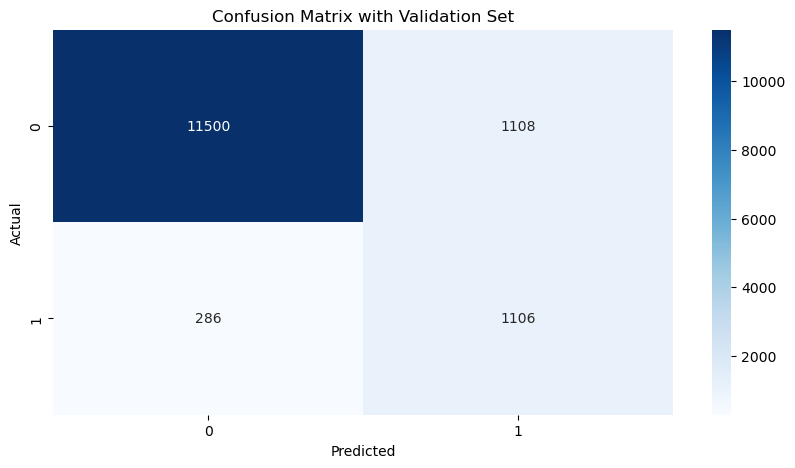

CPU times: total: 16.7 s
Wall time: 16 s


In [555]:
%%time
## Using Random Forest Classifier

rf = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10)
rf.fit(X_train_smote1[selected_features], y_train_smote1)

# Predict on the training set

y_train_pred_rf = rf.predict(X_train_smote1[selected_features])

# Accuracy on the training set

print("Training Set")
metrics_train_rf = classication_mertics(y_train_smote1, y_train_pred_rf)
metrics_train_rf.head()

# Predict on the validation set

y_val_pred_rf = rf.predict(X_val1[selected_features])
metrics_val_rf = classication_mertics(y_val1, y_val_pred_rf)
print()
print("Validation Set")

metrics_val_rf.head()

## Plot confusion matrix for the validation set

cm = confusion_matrix(y_val1, y_val_pred_rf)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# labels

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Validation Set')
plt.show()






#### Random Forest with 30 Best Features using RFE gave accuracy of 91% on Training and 90% on Validation set. Checking with PCA

#### Random Forest with PCA



In [556]:

# Use PCA with Random Forest

rf = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10)
rf.fit(X_train_pca, y_train_pca)

# Predict on the training set
y_train_pred_rf_pca = rf.predict(X_train_pca)

# Accuracy on the training set
print("Training Set")
metrics_train_rf_pca = classication_mertics(y_train_pca, y_train_pred_rf_pca)
print(metrics_train_rf_pca.head())
print()

# Predict on the validation set

y_val_pred_rf_pca = rf.predict(X_val_pca)
metrics_train_rf_pca_val = classication_mertics(y_val_pca, y_val_pred_rf_pca)
print("Validation Set")
print(metrics_train_rf_pca_val.head())





Training Set
Confusion Matrix
[[44575  5684]
 [ 6212 44047]]
Precision:  0.8857050934025055
Recall:  0.8764002467219801
Sensitivity:  0.8764002467219801
Specificity:  0.8869058278119342
False Positive Rate:  0.11309417218806582
Accuracy:  0.8816530372669572
   Precision  Recall  Sensitivity  Specificity  False Positive Rate  Accuracy
0   0.885705  0.8764       0.8764     0.886906             0.113094  0.881653
   Precision  Recall  Sensitivity  Specificity  False Positive Rate  Accuracy
0   0.885705  0.8764       0.8764     0.886906             0.113094  0.881653

Confusion Matrix
[[11024  1584]
 [  335  1057]]
Precision:  0.40022718667171525
Recall:  0.7593390804597702
Sensitivity:  0.7593390804597702
Specificity:  0.8743654822335025
False Positive Rate:  0.12563451776649745
Accuracy:  0.8629285714285714
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0   0.400227  0.759339     0.759339     0.874365             0.125635   

   Accuracy  
0  0.862929  
Validati

#### With Random Forest Classifer and PCA with 30 Components, 88% accuracy with Training data was achieved and 86% with Test data achieved

### Building model with Random Forest Classifier, using Hyperparameter tuning and Cross Validation

In [557]:
### Hyperparameter tuning using GridSearchCV  and Selected features using RFE  
# Random Forest Classifier

rf = RandomForestClassifier(random_state=100)

#grid search parameters

param_grid = {
    'n_estimators': [50, 75, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote1[selected_features], y_train_smote1)

# Best parameters

grid_search.best_params_

# Best estimator

rf_best = grid_search.best_estimator_

# Predict on the training set

y_train_pred_rf_best = rf_best.predict(X_train_smote1[selected_features])

# Accuracy on the training set
metrics_val_rf_best = classication_mertics(y_train_smote1, y_train_pred_rf_best)

# Predict on the validation set

y_val_pred_rf_best = rf_best.predict(X_val1[selected_features])
metrics_val_rf_best = classication_mertics(y_val1, y_val_pred_rf_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Confusion Matrix
[[49440   819]
 [    0 50259]]
Precision:  0.9839656995183836
Recall:  1.0
Sensitivity:  1.0
Specificity:  0.9837044111502418
False Positive Rate:  0.016295588849758253
Accuracy:  0.9918522055751209
   Precision  Recall  Sensitivity  Specificity  False Positive Rate  Accuracy
0   0.983966     1.0          1.0     0.983704             0.016296  0.991852
Confusion Matrix
[[11889   719]
 [  357  1035]]
Precision:  0.5900798175598632
Recall:  0.7435344827586207
Sensitivity:  0.7435344827586207
Specificity:  0.9429727157360406
False Positive Rate:  0.057027284263959394
Accuracy:  0.9231428571428572
   Precision    Recall  Sensitivity  Specificity  False Positive Rate  \
0    0.59008  0.743534     0.743534     0.942973             0.057027   

   Accuracy  
0  0.923143  


In [558]:
metrics_val_rf_best

,Precision,Recall,Sensitivity,Specificity,False Positive Rate,Accuracy
0,0.59008,0.743534,0.743534,0.942973,0.057027,0.923143


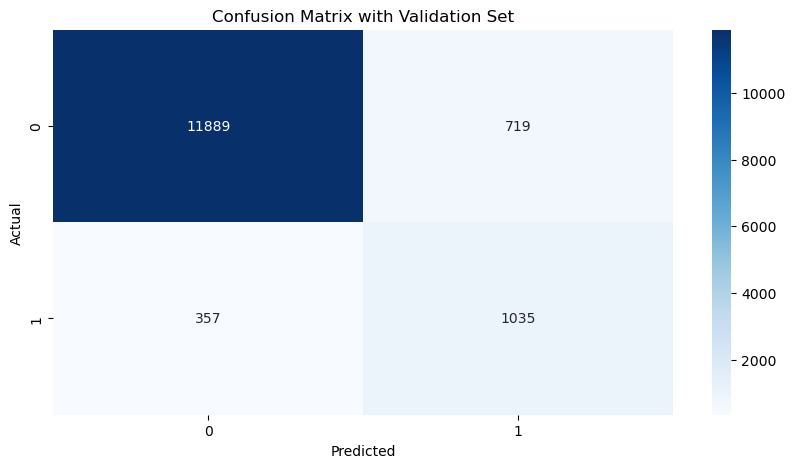

In [559]:
# Plot confusion matrix for the validation set

cm = confusion_matrix(y_val1, y_val_pred_rf_best)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# labels

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Validation Set')
plt.show()


Text(0.5, 1.0, 'ROC Curve')

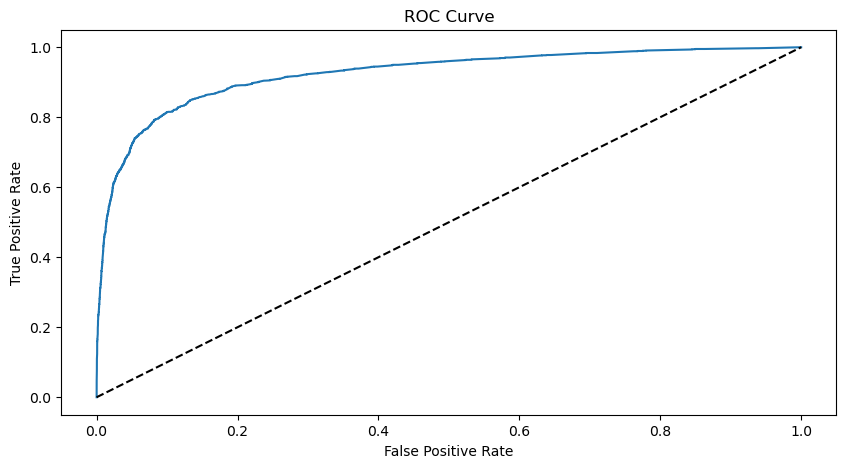

In [560]:
# ROC Curve

# Predict the probability of churn on the validation set

y_val_pred_prob_rf_best = rf_best.predict_proba(X_val1[selected_features])[:,1]

# ROC Curve

fpr, tpr, thresholds = roc_curve(y_val1, y_val_pred_prob_rf_best)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

## With this model, Acccuracy of 92% on Training Set and 92% on Validation Set as well. The model is performing well.  We shall use this model to predict the unseen data

In [561]:
### Predict on the unseen dataset

y_unseen_pred = rf_best.predict(unseen1[selected_features])

# Create a dataframe with id and churn_probability

submission = pd.DataFrame({'id': unseen.index, 'churn_probability': y_unseen_pred})

In [562]:
submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [563]:
submission.shape

(30000, 2)

In [564]:
submission.churn_probability.value_counts()

churn_probability
0    25879
1     4121
Name: count, dtype: int64

In [565]:
# write to csv
submission.to_csv('submission_telecom_churn.csv', index=False)

In [473]:
selected_features

Index(['arpu_6', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_8', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

## Some of the features that are important are 
## Revenue columns, Recharge columns, Total outgoing minutes, Total incoming minutes, Total Recharge Amount.

